### 중고차 블로그 워드 클라우드

In [1]:
!pip install wordcloud

In [2]:
!pip install konlpy

     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
     ---------------------------------------- 0.1/19.4 MB 7.0 MB/s eta 0:00:03
      --------------------------------------- 0.3/19.4 MB 3.2 MB/s eta 0:00:07
      --------------------------------------- 0.4/19.4 MB 3.8 MB/s eta 0:00:05
     - -------------------------------------- 0.6/19.4 MB 3.6 MB/s eta 0:00:06
     - -------------------------------------- 0.7/19.4 MB 3.8 MB/s eta 0:00:06
     - -------------------------------------- 0.8/19.4 MB 3.0 MB/s eta 0:00:07
     -- ------------------------------------- 1.0/19.4 MB 3.1 MB/s eta 0:00:06
     -- ------------------------------------- 1.2/19.4 MB 3.2 MB/s eta 0:00:06
     -- ------------------------------------- 1.3/19.4 MB 3.3 MB/s eta 0:00:06
     -- ------------------------------------- 1.3/19.4 MB 3.3 MB/s eta 0:00:06
     -- ------------------------------------- 1.3/19.4 MB 2.6 MB/s eta 0:00:08
     --- ------------------------------------ 1.5/19.4 MB 2

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
from konlpy.tag import Okt,Komoran
from PIL import Image
import numpy as np
import pandas as pd

In [3]:
blog_data = pd.read_csv('blog_des.csv',encoding='UTF8',index_col=0)
blog_data.head()

,idx,title,body
0,0,"테슬라 중고차 가격, 미국에서 17% 하락... 이유가 뭘까",(출처: 로이터 통신)지난 27일(현지 시간) 로이터 통신(Reuters) 보도에 ...
1,1,현대 전기차 코나 일렉트릭 중고차 가격 하락은 없다,최근 코나 풀체인지 차량이 출시되었습니다.호불호는 있겠지만 디자인이 너무 잘 나왔더...
2,2,현대 전기차 코나 일렉트릭 중고차 가격 하락은 없다,최근 코나 풀체인지 차량이 출시되었습니다.호불호는 있겠지만 디자인이 너무 잘 나왔더...
3,3,교통사고 후 자동차 보험에서 보상하는 자동차(중고차) 시세하락손해(격락손해),광주 양산동한방병원 상담전화광주 첨단 교통사고 한방병원교통사고로 첨단 제이한방병원에...
4,4,중고차 가격 하락 시작??,오늘자 자동차 관련 기사들 가운에 눈에 띄는 것 가운데 하나가 바로 중고차 가격이 ...


In [4]:
data = blog_data['title'].values + blog_data['body'].values

In [5]:
data = list(data)

In [6]:
data = data[11:]

In [7]:
words = []

# 형태소 분석
komoran = Komoran()
for idx,title_body in enumerate(data):
    try:
        nouns = komoran.nouns(title_body)

        for i in nouns:
            if(len(i) == 1 ):
                nouns.remove(i)

        words.extend(nouns)
    except:
        print(idx)
        pass

8
31
165
201
213
245
267
283
288
289
295
313
316
370
382
414
415
520


In [8]:
print(words)

['테슬라', '주가', '폭락', '가나', '상하이', '공장', '생산', '중단', '자율', '주행', '안전', '논란', '사고', '중고차', '가격', '하락', '적정', '가격', '분석', '안녕하세요', '초보', '주식', '경제', '공부', '주인장', '테슬라', '조금', '시작', '주주', '최근', '테슬라', '주가', '과도', '폭락', '마음', '테슬라', '올인', '투자자', '장기간', '보유자', '한국', '미국', '시장', '투자자', '테슬라', '보유', '비율', '테슬라', '주가', '이유', '관련', '뉴스', '후', '전망', '커뮤니티', '반응', '주가', '분석', '영상', '후', '전망', '오늘', '프로', '사이', '프로', '주가', '폭락', '약', '세달', '사이', '프로', '불도', '예측', '불가해', '테슬라', '투자', '돈나무', '언니', '조원', '현재', '만원', '라고', '자위', '테슬라', '악재', '상하이', '공장', '생산', '중단', '예정', '내년', '1월 1일', '상하이', '공장', '휴업', '예정', '휴업', '본래', '예정', '휴업', '중국', '자동차', '시장', '관련', '예정', '악재', '반응', '테슬라', '자율', '주행', '추돌', '사고', '발생', '소식', '뉴스', '테슬라', '주행', '보조', '기능인', '완전', '자율', '주행', '안전', '문제', '테슬라', '모델', '고속도로', '주행', '급제동', '사고', '사망자', '해당', '기사', '지난달', '사고', '소식', '보도', '주가', '악영향', '최대', '주주', '주식', '매도', '트위터', '인수', '소식', '최근', '하락', '이상', '추가', '테슬라', '주식', '매도', '행보', '인해', '주주', '불신', '주부', '영상', '테슬라', '

In [11]:
# 워드 클라우드
def cloud(word):
    palettes = ['spring', 'summer', 'seismic','Pastel1','prism','summer']
    wCloud = Counter(word)

    wc = WordCloud(font_path='malgun', width=2000, height=2000, 
                   scale=5.0, max_font_size=400,
                   colormap = palettes[5])
    gen = wc.generate_from_frequencies(wCloud)
    plt.figure(figsize=(10,10))
    plt.imshow(gen)

    plt.savefig('word_des.png')


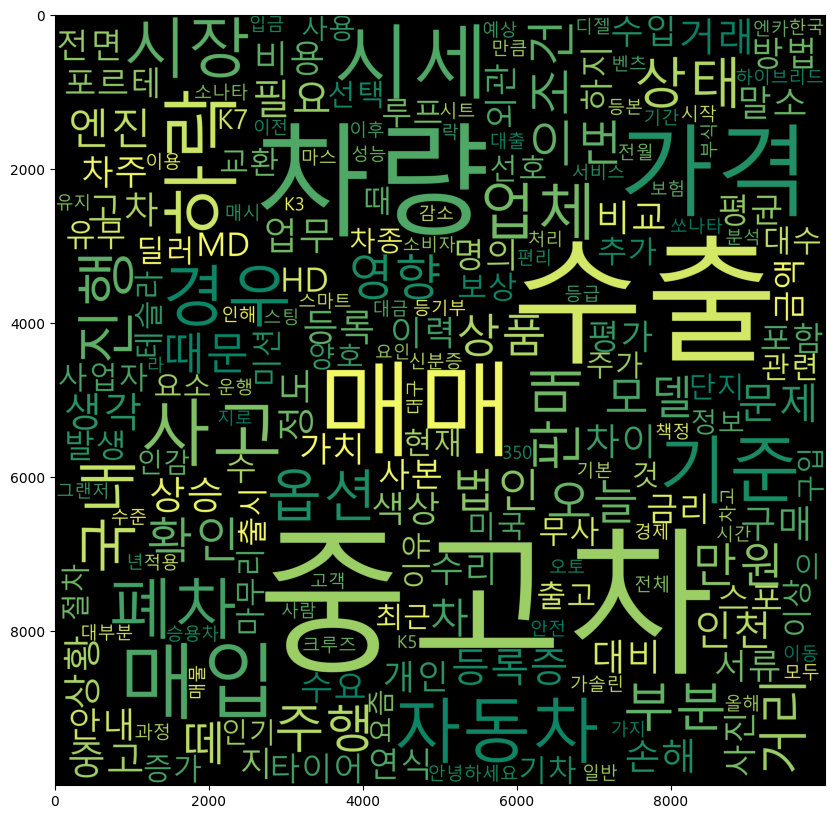

In [12]:
cloud(words)

정렬을 해도, 검색하면 이상하게 검출됨 ... 왜징

In [23]:
count = Counter(words)
print('count : ', count)

# sorted_dict = OrderedDict(count.most_common())
# print(sorted_dict)
sorted_dict = sorted(count.items(), key = lambda item: item[1],reverse=True)
sorted_list = sorted(sorted_dict, key = lambda x:x[1], reverse = True)
print('sorted_list : ',sorted_list)

print(sorted_list[0][0], sorted_list[1][0], sorted_list[2][0], sorted_list[3][0], sorted_list[4][0])

for r in range(0,10):
    print(r, 'delete : ',sorted_list[r][0])
    #sorted_list.remove(sorted_list[r])
    del sorted_list[r]

print(sorted_list)

count :  Counter({'수': 4398, '중고차': 4116, '차량': 3707, '것': 2595, '차': 2479, '곳': 1370, '거': 1041, '수출': 1034, '때문': 1014, '분': 1009, '생각': 1003, '때': 990, '가격': 954, '확인': 933, '경우': 872, '진행': 854, '업체': 761, '이': 750, '매물': 731, '상태': 719, '부분': 701, '판매': 628, '구입': 619, '등': 611, '출고': 610, '정도': 610, '자동차': 608, '할부': 602, '중': 601, '거래': 566, '딜러': 564, '주행': 558, '이용': 551, '중고': 543, '구매': 541, '게': 524, '고객': 523, '사고': 499, '을': 484, '선택': 461, '일': 451, '방문': 446, '매매': 446, '거리': 445, '조건': 443, '제가': 441, '년': 432, '시세': 432, '후': 424, '필요': 423, '만족': 421, '금액': 419, '점검': 403, '점': 397, '시간': 396, '마음': 392, '계약': 389, '번': 388, '옵션': 388, '건': 387, '비용': 386, '부담': 384, '비교': 380, '말': 378, '상황': 370, '성능': 365, '데': 361, '만원': 361, '문제': 360, '엔진': 355, '리스': 352, '서비스': 351, '전': 350, '정보': 349, '시': 345, '관리': 333, '말씀': 330, '카': 325, '감': 320, '후기': 317, '시장': 316, '모델': 313, '이력': 311, '체크': 311, '신용': 309, '방법': 308, '연식': 305, '사람': 305, '대': 304, '상담': 302, '오늘

In [13]:
count = Counter(words)
print(count)

Counter({'중고차': 9422, '수출': 6966, '차량': 5529, '매매': 3709, '가격': 3480, '매입': 2308, '시세': 2192, '하락': 2041, '기준': 1815, '사고': 1788, '자동차': 1668, '경우': 1479, '폐차': 1443, '시장': 1433, '업체': 1269, '진행': 1212, '국내': 1191, '옵션': 1082, '상태': 1026, '판매': 1015, '부분': 940, '주행': 885, '거리': 858, '조건': 847, '영향': 812, '이번': 794, '확인': 785, '오늘': 762, '만원': 753, '법인': 730, '상품': 727, '떼': 722, '모델': 710, '때문': 659, '엔진': 621, '문제': 592, '필요': 566, '차': 566, '인천': 559, '생각': 544, '등록증': 532, '중고': 523, '거래': 503, '상황': 495, '상승': 490, '정도': 477, '업무': 472, '등록': 459, '구매': 455, '고차': 441, '비용': 438, '손해': 435, '차이': 434, '비교': 428, '대비': 425, '말소': 418, '색상': 412, '수리': 405, '안내': 399, '서류': 394, '수입': 386, '사진': 384, '전면': 383, '명의': 383, '개인': 381, '평가': 381, '외관': 377, '연식': 374, '평균': 373, 'HD': 373, '방법': 370, '지': 369, '이력': 367, '하지': 363, '차주': 362, '수요': 359, '가치': 356, '스포': 349, '사본': 342, 'MD': 341, '포르테': 340, '금액': 336, '포함': 336, '금리': 333, '발생': 322, '타이어': 321, '수': 317, '루프': 311, '무

Counter({'수출': 6966, '시세': 2192, '사고': 1788, '폐차': 1443, '업체': 1269, '국내': 1191, '옵션': 1082, '상태': 1026, '판매': 1015, '주행': 885, '거리': 858, '조건': 847, '기준': 808, '모델': 710, '엔진': 621, '문제': 592, '필요': 566, '인천': 559, '등록증': 532, '상황': 495, '상승': 490, '정도': 477, '등록': 459, '구매': 455, '고차': 441, '비용': 438, '손해': 435, '차이': 434, '비교': 428, '말소': 418, '색상': 412, '수리': 405, '서류': 394, '수입': 386, '사진': 384, '전면': 383, '명의': 383, '개인': 381, '평가': 381, '외관': 377, '연식': 374, 'HD': 373, '방법': 370, '이력': 367, '하지': 363, '차주': 362, '수요': 359, '가치': 356, '스포': 349, '사본': 342, 'MD': 341, '포르테': 340, '포함': 336, '금리': 333, '타이어': 321, '수': 317, '루프': 311, '무사': 305, '사업자': 301, '보상': 300, '유무': 300, '출고': 293, '이상': 290, '딜러': 287, '미국': 285, '교환': 285, '추가': 283, '테슬라': 281, '현재': 280, '출시': 278, '기차': 273, '증가': 271, '선호': 266, '관련': 265, '이유': 262, '절차': 262, '요소': 261, '주가': 257, '단지': 253, '양호': 247, '최근': 244, '것': 244, '인기': 244, '구입': 242, '이': 236, '사용': 232, '차종': 232, 'K7': 231, '정보': 231, '

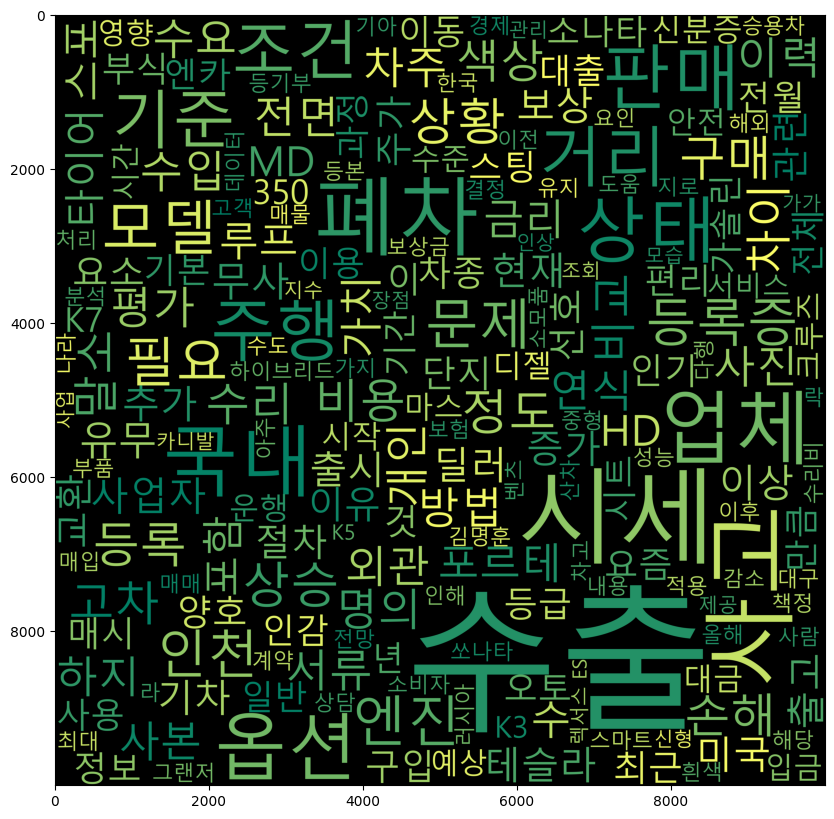

In [17]:
#'중고차' 검색 _ blog.csv
#del_List = ['수','중고차','차량','것','차','곳','거','카','때문','분','생각','때','확인','경우','진행','이','부분','등','정도','자동차','중','이용','게','고객','을','선택','일','제가','후','필요','점','번','데','전','시','카','감','체크','대','안','이번','만','적용','마련','보니','매물','한','가지','시작','하지','편','발생','월','니다','입','견','!!','해당','감사','라고','준비','자','대부분','지','해서','뿐','포','식','원고료','아','은','덕분','안녕하세요','외','요','누','듯','쪽','위','티','다','서','중고']

#'중고차 하락' 검색 + blog_des.csv
del_List = ['중고차','차량','하락','때문','자동차','만원','부분','오늘','법인','진행','이번','안녕하세요','모두','미션','생각','발생','대비','금액','업무','확인','상품','평균','마무리','거래','선택','떼','안내','때','지','대수','차','대부분', '가격','매매','매입','시장','경우','중고','기준','영향']

for item in words:
    if item in del_List:
        words.remove(item)

count = Counter(words)
print(count)

cloud(words)

TODO _ 모델명, 브랜드 언급 글 수